In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [13]:
data=pd.read_csv(r'/Users/smyy.karaalioglu/Desktop/kuggle/air_pollution.csv')

In [15]:
data.columns

Index(['City', ' "Region"', ' "Country"', ' "AirQuality"',
       ' "WaterPollution"'],
      dtype='object')

In [16]:
#Air Quality Column: Air quality varies from 0 (bad quality) to 100 (top good quality)
#Water Pollution Column: Water pollution varies from 0 (no pollution) to 100 (extreme pollution)

data.head(5)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [18]:
data.dtypes

City                  object
 "Region"             object
 "Country"            object
 "AirQuality"        float64
 "WaterPollution"    float64
dtype: object

In [19]:
data.isnull().sum()

City                 0
 "Region"            0
 "Country"           0
 "AirQuality"        0
 "WaterPollution"    0
dtype: int64

In [25]:
data.nunique()

City                 3796
 "Region"            1153
 "Country"            177
 "AirQuality"         667
 "WaterPollution"     561
dtype: int64

In [37]:
#Cleaning Column Headers

data.columns = data.columns.str.replace('"', '')

In [38]:
data.rename(columns={'"Country"':'Country'},inplace=True)
data.rename(columns={'"Region"':'Region'},inplace=True)
data.rename(columns={'"AirQuality"':'AirQuality'},inplace=True)
data.rename(columns={'"WaterPollution"':'WaterPollution'},inplace=True)

In [59]:
data.head(1)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.50495


In [45]:
#There are still unexpected characters in column names

import re

def clean_column_name(col_name):
    return re.sub(r'\W+', '', col_name)


data.columns = [clean_column_name(col) for col in data.columns]

In [55]:
data[data.duplicated()].count()

City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
dtype: int64

In [118]:
#Cleaning rows

data['Country'] = data['Country'].str.replace('"', '')
data['Region'] = data['Region'].str.replace('"', '')
data.head(2)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143


In [166]:
data['AirQuality'] = data['AirQuality'].round(2)
data.head(2)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.82,49.50
1,"Washington, D.C.",District of Columbia,United States of America,66.13,49.11


In [165]:
data['WaterPollution'] = data['WaterPollution'].round(2)
data.head(2)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.82,49.50
1,"Washington, D.C.",District of Columbia,United States of America,66.13,49.11


In [160]:
# Air quality varies from 0 (bad quality) to 100 (top good quality)
# Water pollution varies from 0 (no pollution) to 100 (extreme pollution)

#Which countries have the highest air quality and lowest water pollution levels?

data.sort_values('AirQuality', ascending=False).head(10)

data.sort_values('WaterPollution', ascending=True).head(10)

,City,Region,Country,AirQuality,WaterPollution
1150,Ogden,Utah,United States of America,80.56,0.0
3283,Warrenton,Virginia,United States of America,100.00,0.0
3281,Weatherford,Texas,United States of America,100.00,0.0
3280,Lawrenceville,Georgia,United States of America,100.00,0.0
1021,Trois-Rivieres,Quebec,Canada,82.14,0.0
3275,Cape Canaveral,Florida,United States of America,75.00,0.0
3274,Brentwood,Missouri,United States of America,75.00,0.0
3263,Wenatchee,Washington,United States of America,25.00,0.0
3262,Newbridge,Leinster,Ireland,50.00,0.0
1039,Paide,Jarva County,Estonia,100.00,0.0


In [163]:
# Air quality varies from 0 (bad quality) to 100 (top good quality)
# Water pollution varies from 0 (no pollution) to 100 (extreme pollution)

#Which countries have the lowest air quality and highest water pollution levels?

data.sort_values('AirQuality', ascending=True).head(10)
data.sort_values('WaterPollution', ascending=False).head(10)

,City,Region,Country,AirQuality,WaterPollution
702,Pasay,Metro Manila,Philippines,25.0,100.0
2761,Labasa,Northern Division,Fiji,50.0,100.0
1177,San Fernando,,Philippines,0.0,100.0
406,Barquisimeto,Lara,Venezuela,25.0,100.0
3536,Kluang,Johor,Malaysia,75.0,100.0
3812,Rutherford,Tennessee,United States of America,0.0,100.0
402,Rancagua,O'Higgins Region,Chile,0.0,100.0
3809,Bomassa,Sangha Department,Republic of the Congo,0.0,100.0
3546,Dondo,Sofala,Mozambique,50.0,100.0
2103,Kaifeng,Henan,People's Republic of China,0.0,100.0


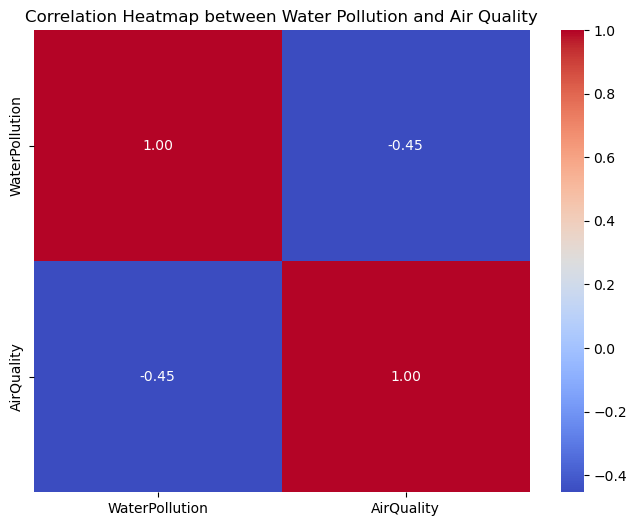

In [164]:
#Is there a correlation between air quality and water pollution levels?

correlation_matrix = data[['WaterPollution','AirQuality']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Water Pollution and Air Quality')
plt.show()

#Negative correlations move in opposite directions;
#There is no correlation between Water Pollution and Air Quality.